### Importing Relevant Packages

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from pycaret.classification import * 
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
data = pd.read_csv('customer_churn.csv')

### Description of dataset

| Column Name          | Column Type  | Column Description                                          |
| -------------------- | ------------ | ------------------------------------------------------------ |
| State                | String       | The state where a customer comes from                        |
| Account length       | Integer      | Number of days a customer has been using services            |
| Area code            | Integer      | The area where a customer comes from                         |
| Phone number         | Alphanumeric | The phone number of a customer                               |
| International plan   | String       | The status of customer international plan                    |
| Voicemail plan       | String       | The status of customer voicemail plan                        |
| No. vmail msgs       | Integer      | Number of voicemail messages sent by a customer              |
| Total day minutes    | Float        | Total call minutes spent by a customer during the day time    |
| Total day calls      | Integer      | Total number of calls made by a customer during the day time |
| Total day charge     | Float        | Total amount charged to a customer during the day time       |
| Total eve minutes    | Float        | Total call minutes spent by a customer during the evening time |
| Total eve calls      | Integer      | Total number of calls made by a customer during the evening time |
| Total eve charge     | Float        | Total amount charged to a customer during the evening time   |
| Total night minutes  | Float        | Total call minutes spent by a customer during the night time |
| Total night calls    | Integer      | Total number of calls made by a customer during the night time |
| Total night charge   | Float        | Total amount charged to a customer during the night time     |
| Total intl minutes   | Float        | Total international call minutes spent by a customer         |
| Total intl calls     | Integer      | Total number of international calls made by a customer       |
| Total int charge     | Float        | Total international call amount charged to a customer        |
| Customer service calls | Integer    | Total number of customer service calls made by a customer    |
| Churn                | Boolean      | Whether a customer is churned or not                         |


### Exploratory Data Analysis

#### Which states have the most number of customers?

In [9]:
customers = data.groupby('state')\
                .size()\
                .to_frame('n_custs')\
                .sort_values(by = 'n_custs', ascending = False)\
                .reset_index()
                

customers_flipped = data.groupby('state')\
                .size()\
                .to_frame('n_custs')\
                .sort_values(by = 'n_custs', ascending = True)\
                .reset_index()

top10 = customers[0:10]
bottom10 = customers_flipped[0:10]

x1 = top10['state']
x2 = bottom10['state']

y1 = top10['n_custs']
y2 = bottom10['n_custs']


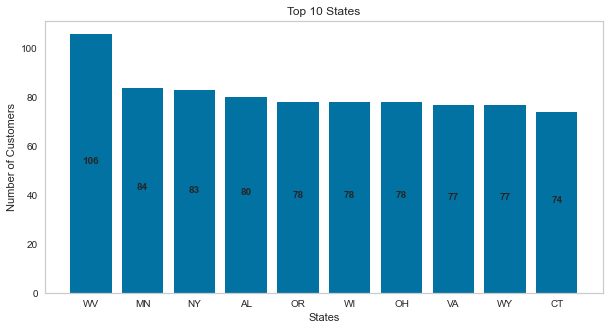

In [10]:
# Plotting top 10
plt.figure(figsize = (10,5))

plt.bar(x1, y1) # top 10

plt.title("Top 10 States")

# adding value labels
for i in range(len(x1)):
        plt.text(i, y1[i]//2, y1[i], ha = 'center', fontweight = 'bold')

plt.xlabel("States")
plt.ylabel("Number of Customers")

plt.grid(False)

plt.show()

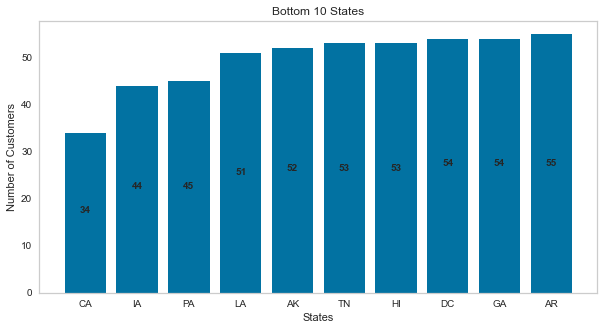

In [11]:
# Plotting top 10
plt.figure(figsize = (10,5))

plt.bar(x2, y2) # bottom 10

plt.title("Bottom 10 States")

# adding value labels
for j in range(len(x2)):
        plt.text(j, y2[j]//2, y2[j], ha = 'center', fontweight = 'bold')

plt.xlabel("States")
plt.ylabel("Number of Customers")

plt.grid(False)

plt.show()

As we can see from the above graphs, the state where most customers come from is West Virginia (WV) and the state where the least number of customers are from is California (CA). 

### Are there any correlations between the variables?

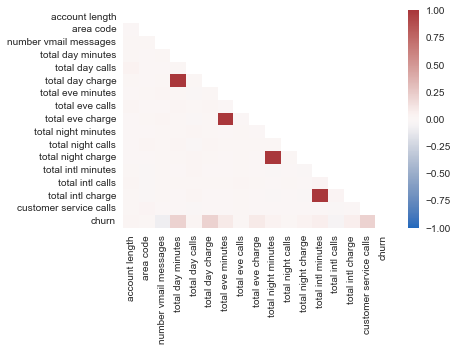

In [27]:
corr_matrix = data.corr().round(2)

# plotting half of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix,vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)

plt.show()

From the correlation matrix above, 

There is positive correlation between:
- total day charge and total day minutes
- total eve charge and total eve minutes
- total intl charge and total intl minutes
- churn and customer service calls
- churn and total day charge
- churn and total day minutes


There is negative correlation between:
- churn and number of vmail messages
